In [ ]:
from google.colab import drive
import os
# 將自己的雲端硬碟掛載上去
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/MyDrive/資策會')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import datetime
import pandas as pd
import numpy as np
df = pd.read_csv('file_1100315_v2.txt',sep="\t", header = None)


# 211.77.241.100 - - [14/Mar/2021:06:13:44 +0800] "GET /803Hospital/Smelly.php?id=9&at=2&data=8.34/8.28 HTTP/1.1" 200 223 "-" "-"
# 104.248.212.113 - - [14/Mar/2021:06:13:16 +0800] "GET /803Hospital/humantraffic.php?data=20&id=5 HTTP/1.1" 200 128 "-" "-"
# 104.248.212.113 - - [14/Mar/2021:06:12:59 +0800] "GET /Enpa/Toiletpaper.php?id=1&at=2&data=3.92/5.37 HTTP/1.1" 200 284 "-" "-"

df['Position'] = df[0].str.extract(r'"GET \/(\S*?)\/')
df = df[(df['Position'] == "Enpa") | (df['Position'] == "803Hospital") | (df['Position'] == "MinshenDemo")].reset_index(drop=True)
df

,0,Position
0,104.248.212.113 - - [07/Mar/2021:05:37:32 +080...,MinshenDemo
1,211.77.241.100 - - [07/Mar/2021:05:37:51 +0800...,MinshenDemo
2,211.77.241.100 - - [07/Mar/2021:05:38:18 +0800...,MinshenDemo
3,211.77.241.100 - - [07/Mar/2021:05:44:05 +0800...,MinshenDemo
4,211.77.241.100 - - [07/Mar/2021:05:44:33 +0800...,MinshenDemo
...,...,...
27115,104.248.212.113 - - [13/Mar/2021:23:58:55 +080...,Enpa
27116,104.248.212.113 - - [13/Mar/2021:23:58:58 +080...,Enpa
27117,104.248.212.113 - - [13/Mar/2021:23:59:23 +080...,Enpa
27118,104.248.212.113 - - [14/Mar/2021:00:00:04 +080...,Enpa


In [ ]:
# r'\[(.*?)\].*\/(.*).php\?'
df["Type"] = df[0].str.extract(r'\].*\/(.*).php\?')
df

,0,Position,Type
0,104.248.212.113 - - [07/Mar/2021:05:37:32 +080...,MinshenDemo,humantraffic
1,211.77.241.100 - - [07/Mar/2021:05:37:51 +0800...,MinshenDemo,Toiletpaper
2,211.77.241.100 - - [07/Mar/2021:05:38:18 +0800...,MinshenDemo,Smelly
3,211.77.241.100 - - [07/Mar/2021:05:44:05 +0800...,MinshenDemo,Toiletpaper
4,211.77.241.100 - - [07/Mar/2021:05:44:33 +0800...,MinshenDemo,Smelly
...,...,...,...
27115,104.248.212.113 - - [13/Mar/2021:23:58:55 +080...,Enpa,humantraffic
27116,104.248.212.113 - - [13/Mar/2021:23:58:58 +080...,Enpa,Smelly
27117,104.248.212.113 - - [13/Mar/2021:23:59:23 +080...,Enpa,Smelly
27118,104.248.212.113 - - [14/Mar/2021:00:00:04 +080...,Enpa,Toiletpaper


# S(Smelly), T(Toiletpaper), h(humantraffich) 的格式不一樣，分開做！





## 先做S & T


In [ ]:
# S for Smelly
# T for Toiletpaper
# h for humantraffic

# 先處理 S & T
df_ST = df[(df["Type"]=="Smelly") | (df["Type"]=="Toiletpaper")].copy()

# \[(.*?)\].*\/.*php.*id=(\d*).*&data=(\S*)
df_ST[["Time", "id", 'at', "data", ]] = df_ST[0].str.extract(r'\[(\S*).*\].*\/.*php.*id=(\d*)&at=(\d*)&data=(\S*)')
df_ST.drop(0, axis=1, inplace=True)
df_ST['id'], df_ST['at'] = df_ST['id'].astype(int), df_ST['at'].astype(int)
df_ST

,Position,Type,Time,id,at,data
1,MinshenDemo,Toiletpaper,07/Mar/2021:05:37:51,9,3,2.15/2.04/7.56
2,MinshenDemo,Smelly,07/Mar/2021:05:38:18,12,2,3.12/4.53
3,MinshenDemo,Toiletpaper,07/Mar/2021:05:44:05,9,3,2.14/2.04/7.57
4,MinshenDemo,Smelly,07/Mar/2021:05:44:33,12,2,2.06/2.81
5,MinshenDemo,Toiletpaper,07/Mar/2021:05:50:17,9,3,2.14/2.03/7.54
...,...,...,...,...,...,...
27114,Enpa,Toiletpaper,13/Mar/2021:23:58:10,7,2,5.71/5.19
27116,Enpa,Smelly,13/Mar/2021:23:58:58,3,2,6.70/8.28
27117,Enpa,Smelly,13/Mar/2021:23:59:23,5,1,6.66
27118,Enpa,Toiletpaper,14/Mar/2021:00:00:04,3,2,2.88/4.29


In [ ]:
for index, row in df_ST.iterrows():
  df_ST.loc[index, 'id'] = str(list(range(row['id'], row['id']+row['at'])))
df_ST['id'] = df_ST['id'].str[1: -1]
df_ST

,Position,Type,Time,id,at,data
1,MinshenDemo,Toiletpaper,07/Mar/2021:05:37:51,"9, 10, 11",3,2.15/2.04/7.56
2,MinshenDemo,Smelly,07/Mar/2021:05:38:18,"12, 13",2,3.12/4.53
3,MinshenDemo,Toiletpaper,07/Mar/2021:05:44:05,"9, 10, 11",3,2.14/2.04/7.57
4,MinshenDemo,Smelly,07/Mar/2021:05:44:33,"12, 13",2,2.06/2.81
5,MinshenDemo,Toiletpaper,07/Mar/2021:05:50:17,"9, 10, 11",3,2.14/2.03/7.54
...,...,...,...,...,...,...
27114,Enpa,Toiletpaper,13/Mar/2021:23:58:10,"7, 8",2,5.71/5.19
27116,Enpa,Smelly,13/Mar/2021:23:58:58,"3, 4",2,6.70/8.28
27117,Enpa,Smelly,13/Mar/2021:23:59:23,5,1,6.66
27118,Enpa,Toiletpaper,14/Mar/2021:00:00:04,"3, 4",2,2.88/4.29


In [ ]:
tmp = df_ST.copy()

In [ ]:
df_ST = tmp.copy()
# df_ST['id'] = df_ST['id'].str.extract(r'\[(.*)\]')
# df_ST_tmp['id'] = df_ST_tmp['id'].str.split(',', expand=True)

# df_ST = df_ST.astype(str).to_string()
df_ST_1 = df_ST.copy()
df_ST_2 = df_ST.copy()
df_ST_3 = df_ST.copy()
df_ST_1[['data1']] = df_ST.loc[df_ST['at']==1, 'data'].str.split('/', expand=True)
df_ST_2[['data1', 'data2']] = df_ST.loc[df_ST['at']==2, 'data'].str.split('/', expand=True)
df_ST_3[['data1', 'data2', 'data3']] = df_ST.loc[df_ST['at']==3, 'data'].str.split('/', expand=True)
df_ST_2.update(df_ST_1)
df_ST_3.update(df_ST_2)
df_ST = df_ST_3.copy()


df_ST_1 = df_ST.copy()
df_ST_2 = df_ST.copy()
df_ST_3 = df_ST.copy()
df_ST_1[['id1']] = df_ST.loc[df_ST['at']==1, 'id'].str.split(',', expand=True)
df_ST_2[['id1', 'id2']] = df_ST.loc[df_ST['at']==2, 'id'].str.split(',', expand=True)
df_ST_3[['id1', 'id2', 'id3']] = df_ST.loc[df_ST['at']==3, 'id'].str.split(',', expand=True)
df_ST_2.update(df_ST_1)
df_ST_3.update(df_ST_2)
df_ST = df_ST_3.copy()

df_ST.drop(['at', 'id', 'data'], axis=1, inplace=True)
df_ST

,Position,Type,Time,data1,data2,data3,id1,id2,id3
1,MinshenDemo,Toiletpaper,07/Mar/2021:05:37:51,2.15,2.04,7.56,9,10,11
2,MinshenDemo,Smelly,07/Mar/2021:05:38:18,3.12,4.53,NaN,12,13,NaN
3,MinshenDemo,Toiletpaper,07/Mar/2021:05:44:05,2.14,2.04,7.57,9,10,11
4,MinshenDemo,Smelly,07/Mar/2021:05:44:33,2.06,2.81,NaN,12,13,NaN
5,MinshenDemo,Toiletpaper,07/Mar/2021:05:50:17,2.14,2.03,7.54,9,10,11
...,...,...,...,...,...,...,...,...,...
27114,Enpa,Toiletpaper,13/Mar/2021:23:58:10,5.71,5.19,NaN,7,8,NaN
27116,Enpa,Smelly,13/Mar/2021:23:58:58,6.70,8.28,NaN,3,4,NaN
27117,Enpa,Smelly,13/Mar/2021:23:59:23,6.66,NaN,NaN,5,NaN,NaN
27118,Enpa,Toiletpaper,14/Mar/2021:00:00:04,2.88,4.29,NaN,3,4,NaN


In [ ]:
tmp = df_ST.copy()

In [ ]:
df_ST = tmp.copy()

df_ST[['id1', 'id2', 'id3', 'data1', 'data2', 'data3']] = df_ST[['id1', 'id2', 'id3', 'data1', 'data2', 'data3']].astype(str)
df_ST['datas'] = df_ST['id1'] + '/' + df_ST['data1'] + ',' + df_ST['id2'] + '/' + df_ST['data2'] + ',' + df_ST['id3'] + '/' + df_ST['data3']
df_ST.drop(['data1', 'data2', 'data3', 'id1', 'id2', 'id3'], axis=1, inplace=True)

df_ST

,Position,Type,Time,datas
1,MinshenDemo,Toiletpaper,07/Mar/2021:05:37:51,"9/2.15, 10/2.04, 11/7.56"
2,MinshenDemo,Smelly,07/Mar/2021:05:38:18,"12/3.12, 13/4.53,nan/nan"
3,MinshenDemo,Toiletpaper,07/Mar/2021:05:44:05,"9/2.14, 10/2.04, 11/7.57"
4,MinshenDemo,Smelly,07/Mar/2021:05:44:33,"12/2.06, 13/2.81,nan/nan"
5,MinshenDemo,Toiletpaper,07/Mar/2021:05:50:17,"9/2.14, 10/2.03, 11/7.54"
...,...,...,...,...
27114,Enpa,Toiletpaper,13/Mar/2021:23:58:10,"7/5.71, 8/5.19,nan/nan"
27116,Enpa,Smelly,13/Mar/2021:23:58:58,"3/6.70, 4/8.28,nan/nan"
27117,Enpa,Smelly,13/Mar/2021:23:59:23,"5/6.66,nan/nan,nan/nan"
27118,Enpa,Toiletpaper,14/Mar/2021:00:00:04,"3/2.88, 4/4.29,nan/nan"


In [ ]:
tmp = df_ST.copy()

In [ ]:
df_ST = tmp.copy()

df_ST = (df_ST.set_index(['Position', 'Type',	'Time'])['datas'].str.split(',')
          .apply(pd.Series)
          .stack()
          .reset_index()
          .drop('level_3', axis=1)
          .rename(columns={0: 'rdata'}))

df_ST[['id', 'data']] = df_ST['rdata'].str.split('/', expand=True).astype("float")
df_ST.drop(['rdata'], axis=1,inplace=True)
df_ST.dropna(subset=['id', 'data'], inplace=True)
df_ST['id'] = df_ST['id'].astype(int)
df_ST

,Position,Type,Time,id,data
0,MinshenDemo,Toiletpaper,07/Mar/2021:05:37:51,9,2.15
1,MinshenDemo,Toiletpaper,07/Mar/2021:05:37:51,10,2.04
2,MinshenDemo,Toiletpaper,07/Mar/2021:05:37:51,11,7.56
3,MinshenDemo,Smelly,07/Mar/2021:05:38:18,12,3.12
4,MinshenDemo,Smelly,07/Mar/2021:05:38:18,13,4.53
...,...,...,...,...,...
47433,Enpa,Smelly,13/Mar/2021:23:59:23,5,6.66
47436,Enpa,Toiletpaper,14/Mar/2021:00:00:04,3,2.88
47437,Enpa,Toiletpaper,14/Mar/2021:00:00:04,4,4.29
47439,Enpa,Toiletpaper,14/Mar/2021:00:00:27,5,3.67


## 再做h

In [ ]:
df_h = df[df["Type"]=="humantraffic"].copy()
df_h[["Time", "data", "id", ]] = df_h[0].str.extract(r'\[(\S*).*\].*\/.*php.*data=(\S*)&id=(\d*)')
df_h.drop(0, axis=1, inplace=True)
df_h

,Position,Type,Time,data,id
0,MinshenDemo,humantraffic,07/Mar/2021:05:37:32,0,10
9,Enpa,humantraffic,07/Mar/2021:05:59:23,0,1
11,803Hospital,humantraffic,07/Mar/2021:06:00:32,0,7
14,Enpa,humantraffic,07/Mar/2021:06:00:46,0,4
16,Enpa,humantraffic,07/Mar/2021:06:00:57,0,3
...,...,...,...,...,...
27088,Enpa,humantraffic,13/Mar/2021:23:36:38,0,3
27098,Enpa,humantraffic,13/Mar/2021:23:45:51,1,2
27103,Enpa,humantraffic,13/Mar/2021:23:47:31,0,2
27113,Enpa,humantraffic,13/Mar/2021:23:57:14,1,1


## 合併STh

In [ ]:
df_ST.shape

(27270, 5)

In [ ]:
df_h.shape

(5904, 5)

In [ ]:
df_ST.shape[0] + df_h.shape[0]

33174

In [ ]:
df = pd.concat([df_ST, df_h], ignore_index=True)
df['Time'] = pd.to_datetime(df['Time'], format="%d/%b/%Y:%H:%M:%S")
df['data'] = pd.to_numeric(df['data'])
with pd.option_context("display.min_rows", 20):
  display(df)

,Position,Type,Time,id,data
0,MinshenDemo,Toiletpaper,2021-03-07 05:37:51,9,2.15
1,MinshenDemo,Toiletpaper,2021-03-07 05:37:51,10,2.04
2,MinshenDemo,Toiletpaper,2021-03-07 05:37:51,11,7.56
3,MinshenDemo,Smelly,2021-03-07 05:38:18,12,3.12
4,MinshenDemo,Smelly,2021-03-07 05:38:18,13,4.53
5,MinshenDemo,Toiletpaper,2021-03-07 05:44:05,9,2.14
6,MinshenDemo,Toiletpaper,2021-03-07 05:44:05,10,2.04
7,MinshenDemo,Toiletpaper,2021-03-07 05:44:05,11,7.57
8,MinshenDemo,Smelly,2021-03-07 05:44:33,12,2.06
9,MinshenDemo,Smelly,2021-03-07 05:44:33,13,2.81


In [ ]:
df.dtypes

Position            object
Type                object
Time        datetime64[ns]
id                  object
data               float64
dtype: object

# 存入SQL (未完成)

In [ ]:
tmp = df.copy()

In [ ]:
df = tmp.copy()
df

,Position,Type,Time,id,data
0,MinshenDemo,Toiletpaper,2021-03-07 05:37:51,9,2.15
1,MinshenDemo,Toiletpaper,2021-03-07 05:37:51,10,2.04
2,MinshenDemo,Toiletpaper,2021-03-07 05:37:51,11,7.56
3,MinshenDemo,Smelly,2021-03-07 05:38:18,12,3.12
4,MinshenDemo,Smelly,2021-03-07 05:38:18,13,4.53
...,...,...,...,...,...
33169,Enpa,humantraffic,2021-03-13 23:36:38,3,0.00
33170,Enpa,humantraffic,2021-03-13 23:45:51,2,1.00
33171,Enpa,humantraffic,2021-03-13 23:47:31,2,0.00
33172,Enpa,humantraffic,2021-03-13 23:57:14,1,1.00


In [ ]:
!pip install db-sqlite3

In [ ]:
import sqlite3

db = sqlite3.connect('testing.db')
db.execute('drop table if exists datas')
try:
  db.execute("create table datas(Position text NOT NULL, Type text NOT NULL, Time datetime, id int, data numeric)")
except:
  print('Table already exists !!')

In [ ]:
cmd = 'insert into datas(Position, Type, Time, id, data values)'
df.to_sql('datas', con=db, if_exists='append', index=False)
db.execute("SELECT * FROM datas").fetchall()

[('MinshenDemo', 'Toiletpaper', '2021-03-07 05:37:51', 9, 2.15),
 ('MinshenDemo', 'Toiletpaper', '2021-03-07 05:37:51', 10, 2.04),
 ('MinshenDemo', 'Toiletpaper', '2021-03-07 05:37:51', 11, 7.56),
 ('MinshenDemo', 'Smelly', '2021-03-07 05:38:18', 12, 3.12),
 ('MinshenDemo', 'Smelly', '2021-03-07 05:38:18', 13, 4.53),
 ('MinshenDemo', 'Toiletpaper', '2021-03-07 05:44:05', 9, 2.14),
 ('MinshenDemo', 'Toiletpaper', '2021-03-07 05:44:05', 10, 2.04),
 ('MinshenDemo', 'Toiletpaper', '2021-03-07 05:44:05', 11, 7.57),
 ('MinshenDemo', 'Smelly', '2021-03-07 05:44:33', 12, 2.06),
 ('MinshenDemo', 'Smelly', '2021-03-07 05:44:33', 13, 2.81),
 ('MinshenDemo', 'Toiletpaper', '2021-03-07 05:50:17', 9, 2.14),
 ('MinshenDemo', 'Toiletpaper', '2021-03-07 05:50:17', 10, 2.03),
 ('MinshenDemo', 'Toiletpaper', '2021-03-07 05:50:17', 11, 7.54),
 ('MinshenDemo', 'Smelly', '2021-03-07 05:50:55', 12, 2.15),
 ('MinshenDemo', 'Smelly', '2021-03-07 05:50:55', 13, 2.85),
 ('MinshenDemo', 'Toiletpaper', '2021-03-07

# Matplotlib繪圖

In [ ]:
tmp = df.copy()

In [ ]:
df = tmp.copy()
df["Time(%H)"] = df['Time'].dt.hour
df

,Position,Type,Time,id,data,Time(%H)
0,MinshenDemo,Toiletpaper,2021-03-07 05:37:51,9,2.15,5.0
1,MinshenDemo,Toiletpaper,2021-03-07 05:37:51,10,2.04,5.0
2,MinshenDemo,Toiletpaper,2021-03-07 05:37:51,11,7.56,5.0
3,MinshenDemo,Smelly,2021-03-07 05:38:18,12,3.12,5.0
4,MinshenDemo,Smelly,2021-03-07 05:38:18,13,4.53,5.0
...,...,...,...,...,...,...
33169,Enpa,humantraffic,2021-03-13 23:36:38,3,0.00,23.0
33170,Enpa,humantraffic,2021-03-13 23:45:51,2,1.00,23.0
33171,Enpa,humantraffic,2021-03-13 23:47:31,2,0.00,23.0
33172,Enpa,humantraffic,2021-03-13 23:57:14,1,1.00,23.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

from scipy.signal import find_peaks

In [ ]:
df_803Hospital_Smelly = df[(df['Position']=='803Hospital') & (df['Type']=='Smelly')].sort_values(by='Time')
df_803Hospital_Tolietpaper = df[(df['Position']=='803Hospital') & (df['Type']=='Tolietpaper')].sort_values(by='Time')
df_803Hospital_humantraffic = df[(df['Position']=='803Hospital') & (df['Type']=='humantraffic')].sort_values(by='Time')

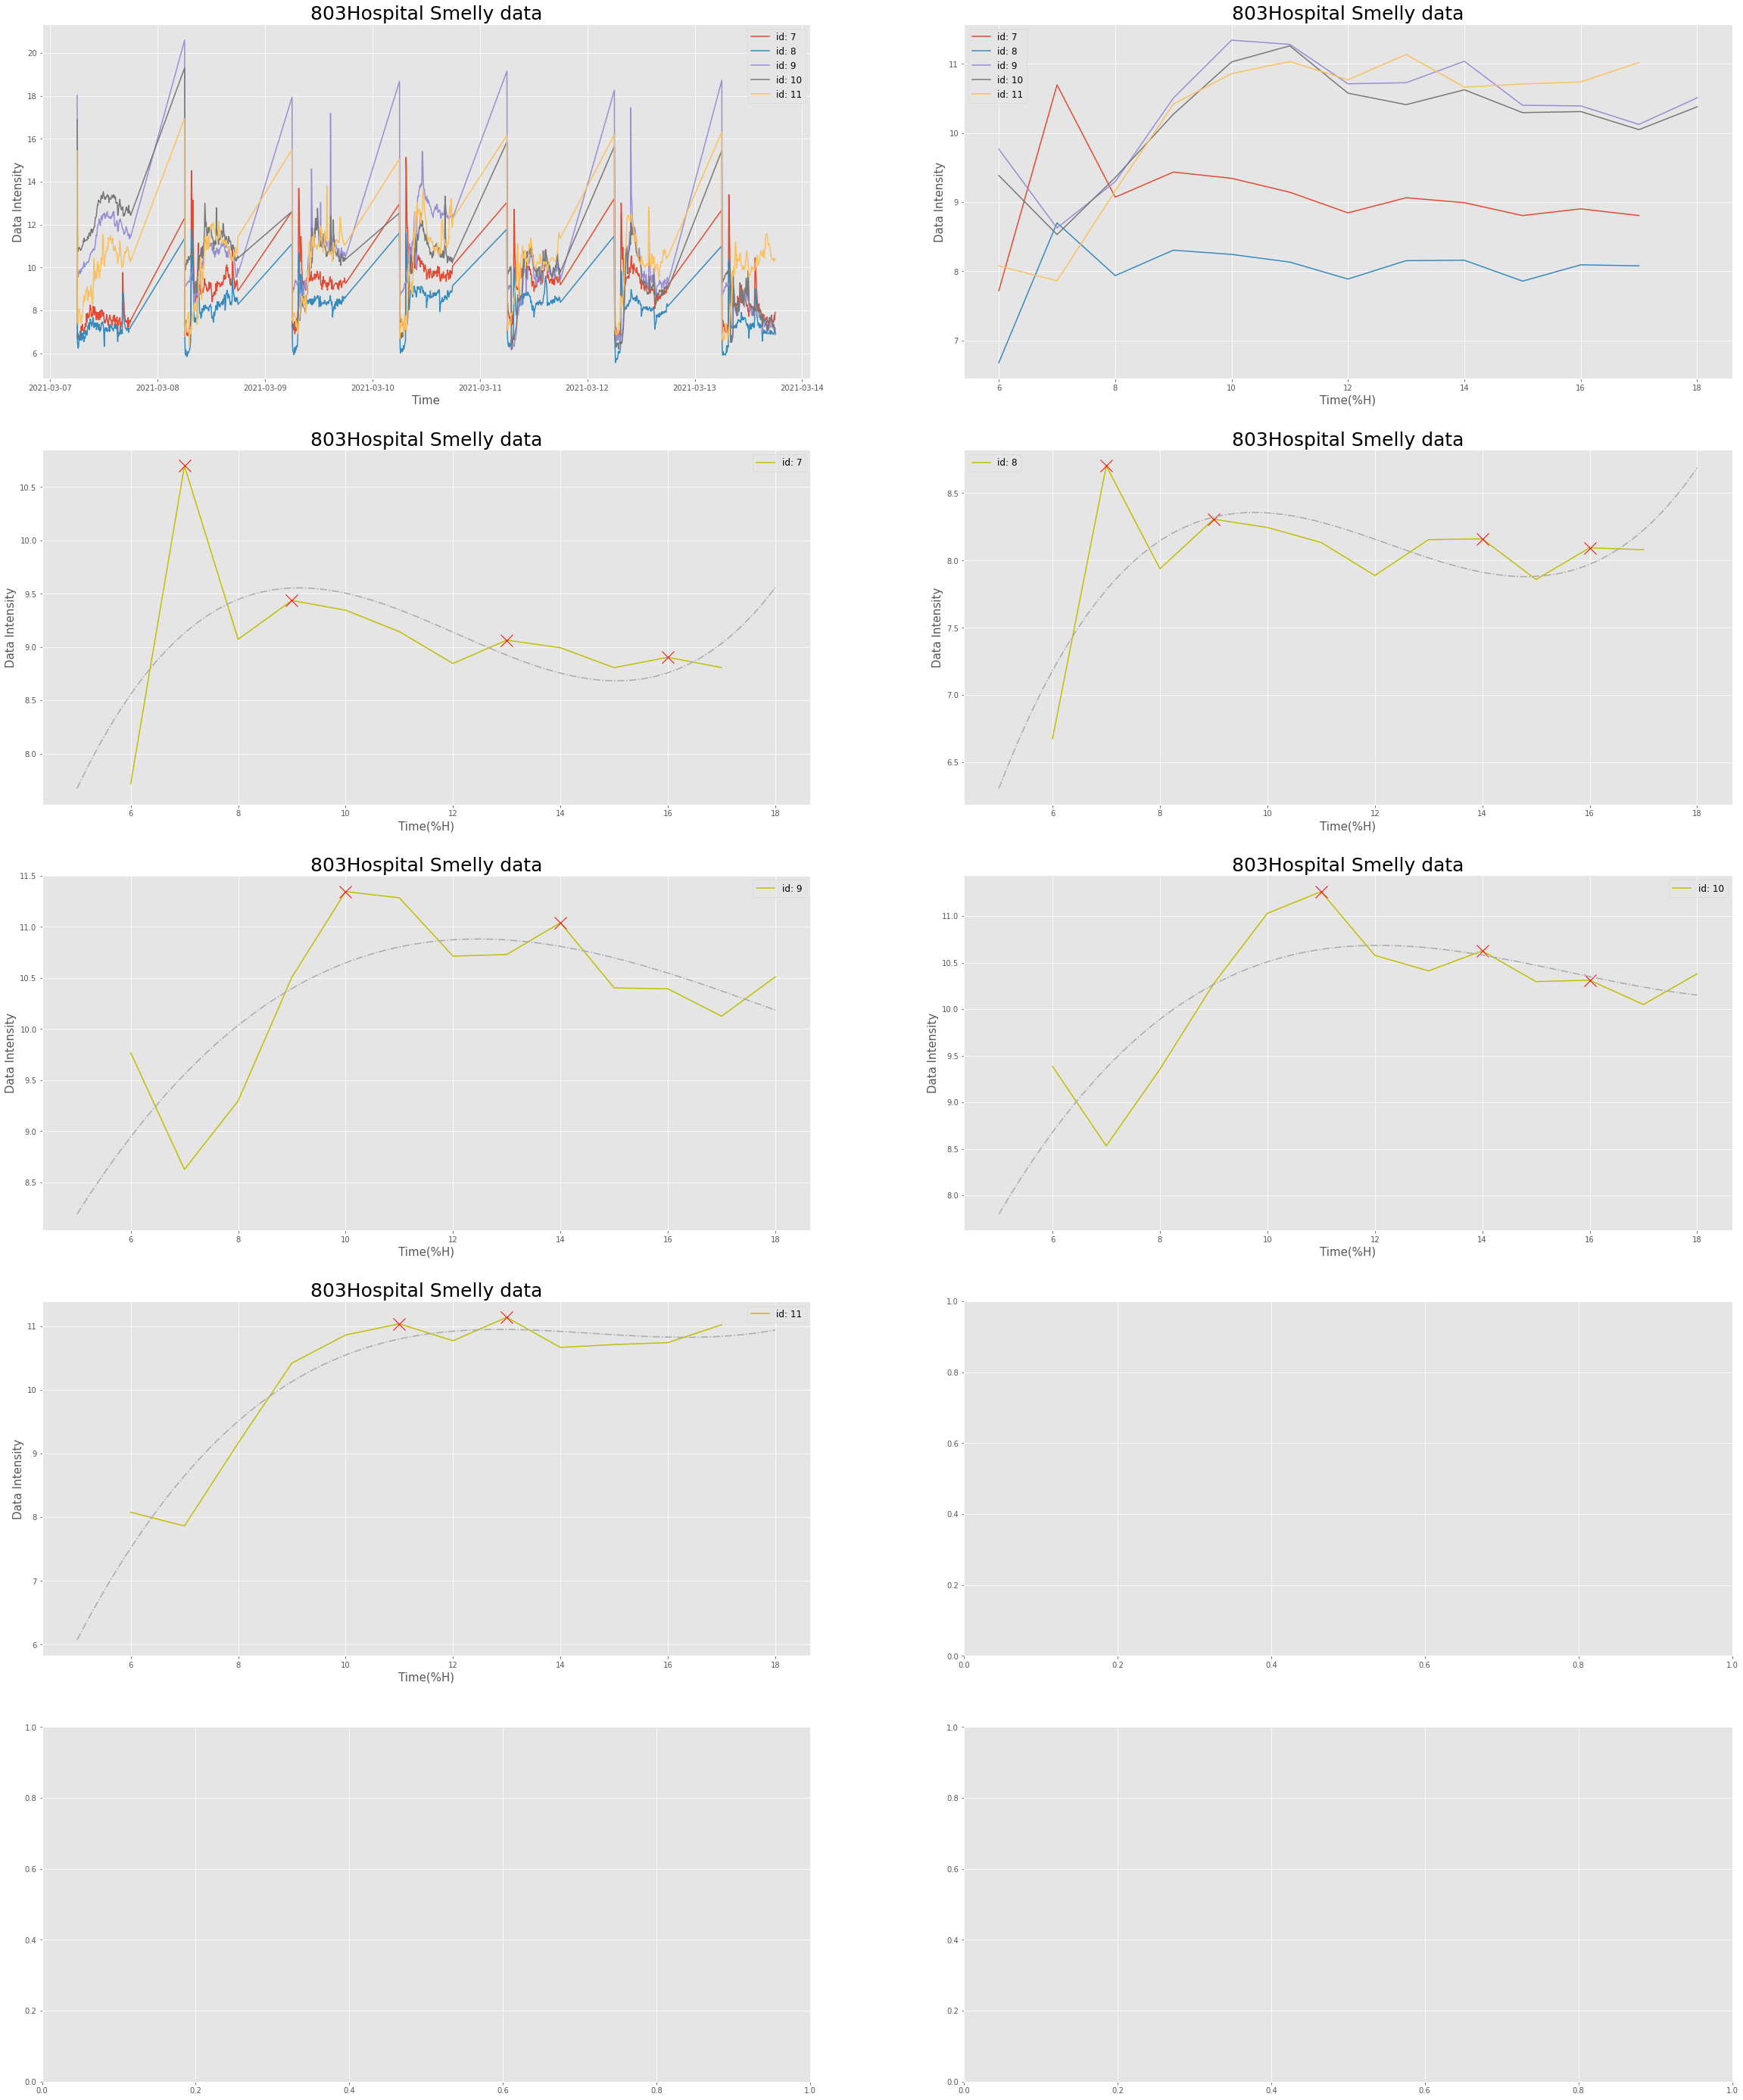

In [ ]:
#指定圖型大小
# plt.figure(figsize = (20,10))
plt.subplots(5, 2, figsize=(40,50))
plt.subplot(5, 2, 1)
#做圖
for id in sorted(df_803Hospital_Smelly['id'].unique()):
  plot_data = df_803Hospital_Smelly[df_803Hospital_Smelly['id']==id]
  plt.plot(plot_data['Time'], plot_data['data'], label = 'id: '+ str(id))

# 圖示
plt.legend(fontsize = 12)
#指定圖片標題跟xy軸標籤 與標籤字型大小
plt.title(f'803Hospital Smelly data', fontsize = 25)
plt.xlabel('Time', fontsize = 15)
plt.ylabel('Data Intensity', fontsize = 15)


# ----------------------------------------------------------------------------------
# df_803Hospital_Smelly.groupby(['id', 'Time(%H)']).mean()
plt.subplot(5, 2, 2)

df_803Hospital_Smelly_byH = pd.DataFrame(df_803Hospital_Smelly.groupby(['id', 'Time(%H)']).mean()).reset_index()
#做圖
for id in sorted(df_803Hospital_Smelly_byH['id'].unique()):
  plot_data = df_803Hospital_Smelly_byH[df_803Hospital_Smelly_byH['id']==id]
  plt.plot(plot_data['Time(%H)'], plot_data['data'], label = 'id: '+ str(id))

# 圖示
plt.legend(fontsize = 12)
#指定圖片標題跟xy軸標籤 與標籤字型大小
plt.title(f'803Hospital Smelly data', fontsize = 25)
plt.xlabel('Time(%H)', fontsize = 15)
plt.ylabel('Data Intensity', fontsize = 15)

# ----------------------------------------------------------------------------------
pn = 3
for id in sorted(df_803Hospital_Smelly_byH['id'].unique()):
  plt.subplot(5, 2, pn)
  plot_data = df_803Hospital_Smelly_byH[df_803Hospital_Smelly_byH['id']==id].reset_index()
  plt.plot(plot_data['Time(%H)'], plot_data['data'], label = 'id: '+ str(id), color='y')

  # peak
  # 可try scipy.signal.peak_prominences
  peaks, _ = find_peaks(plot_data['data']) #, height=plot_data['data'].mean()+plot_data['data'].std()
  plt.plot(plot_data.loc[peaks, 'Time(%H)'], plot_data.loc[peaks, 'data'], "x", markersize="16", color='red')
  
  # regression
  # 三次方回歸
  z = np.polyfit(plot_data['Time(%H)'], plot_data['data'], 3)
  p = np.poly1d(z)
  xp = np.linspace(5, 18, 65)
  _ = plt.plot(xp, p(xp), '-.', color='darkgrey')

  # 圖示
  plt.legend(fontsize = 12)
  #指定圖片標題跟xy軸標籤 與標籤字型大小
  plt.title(f'803Hospital Smelly data', fontsize = 25)
  plt.xlabel('Time(%H)', fontsize = 15)
  plt.ylabel('Data Intensity', fontsize = 15)
  pn = pn + 1
#畫出圖片
plt.show()


